In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import random
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD
from keras.metrics import categorical_crossentropy
from keras.optimizers import SGD
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train shape', X_train.shape, 'X_test shape', X_test.shape)

11490434/11490434 [==============================] - 2s 0us/step
X_train shape (60000, 28, 28) X_test shape (10000, 28, 28)


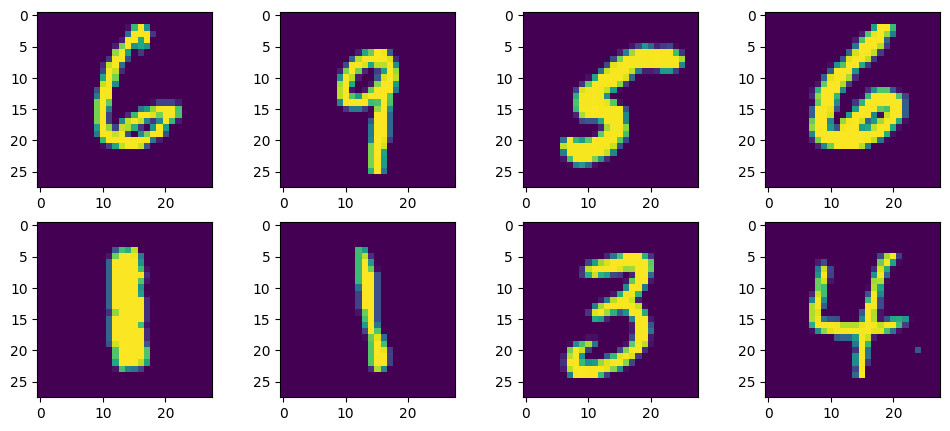

In [3]:
plt.figure(figsize = (12,5))
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240+1+i)
  plt.imshow(X_train[ind])

In [4]:
def preprocess_data(X_train, y_train, X_test, y_test):
  # reshape images to the required size of Keras
  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

  # convert image values from integers to floats
  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')

  # normalization
  X_train = X_train/255.0
  X_test_norm = X_test/255.0

  # One-hot encoding label
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)

  return X_train, y_train, X_test, y_test

In [5]:
def LeNet():
  model = Sequential()

  # Convolutional layer
  model.add(Conv2D(filters = 6, kernel_size = (5,5), padding = 'same',
                   activation = 'relu', input_shape = (28,28,1)))

  # Max-pooing layer with pooling window size is 2x2
  model.add(MaxPooling2D(pool_size = (2,2)))

  # Convolutional layer
  model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))

  # Max-pooling layer
  model.add(MaxPooling2D(pool_size = (2,2)))

  # Flatten layer
  model.add(Flatten())

  # The first fully connected layer
  model.add(Dense(120, activation = 'relu'))

  # The output layer
  model.add(Dense(10, activation = 'softmax'))

  # compile the model with a loss function, a metric and an optimizer function
  # In this case, the loss function is categorical crossentropy,
  # we use Stochastic Gradient Descent (SGD) method with learning rate lr = 0.01 to optimize the loss function
  # metric: accuracy

  opt = SGD(learning_rate = 0.01)
  model.compile(loss = categorical_crossentropy,
                optimizer = opt,
                metrics = ['accuracy'])

  return model

In [6]:
LeNet_model = LeNet()
LeNet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [7]:
def summary_history(history):
  plt.figure(figsize = (10,6))
  plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
  plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
  plt.legend()
  plt.title('Accuracy')
  plt.show()

def train_model(model, X_train, y_train, X_test, y_test, epochs = 10, batch_size = 128):
  # Rescaling all training and testing data
  X_train, y_train, X_test, y_test = preprocess_data(X_train, y_train, X_test, y_test)
  # Fitting the model on the training set
  history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size,
                      steps_per_epoch = X_train.shape[0]//batch_size,
                      validation_data = (X_test, y_test),
                      validation_steps = X_test.shape[0]//batch_size, verbose = 1)
  # evaluating the model
  _, acc = model.evaluate(X_test, y_test, verbose = 1)
  print('%.3f' % (acc * 100.0))
  summary_history(history)

Epoch 1/10
468/468 [==============================] - 6s 6ms/step - loss: 1.2128 - accuracy: 0.6376 - val_loss: 40.4266 - val_accuracy: 0.8934
Epoch 2/10
468/468 [==============================] - 2s 4ms/step - loss: 0.3132 - accuracy: 0.9074 - val_loss: 32.2907 - val_accuracy: 0.9234
Epoch 3/10
468/468 [==============================] - 2s 4ms/step - loss: 0.2244 - accuracy: 0.9342 - val_loss: 22.9015 - val_accuracy: 0.9490
Epoch 4/10
468/468 [==============================] - 2s 5ms/step - loss: 0.1778 - accuracy: 0.9483 - val_loss: 18.8615 - val_accuracy: 0.9575
Epoch 5/10
468/468 [==============================] - 3s 6ms/step - loss: 0.1483 - accuracy: 0.9561 - val_loss: 16.8058 - val_accuracy: 0.9613
Epoch 6/10
468/468 [==============================] - 2s 4ms/step - loss: 0.1275 - accuracy: 0.9620 - val_loss: 14.7149 - val_accuracy: 0.9678
Epoch 7/10
468/468 [==============================] - 2s 5ms/step - loss: 0.1132 - accuracy: 0.9657 - val_loss: 12.6715 - val_accuracy: 0.9710

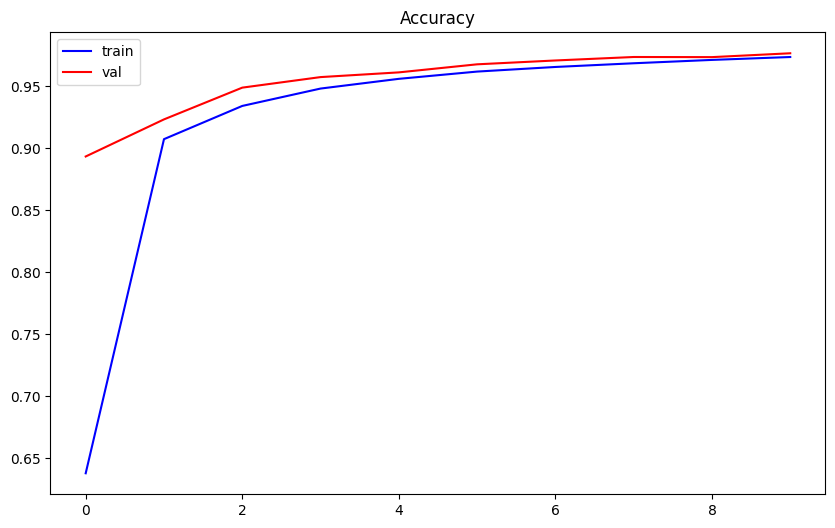

In [8]:
train_model(LeNet_model, X_train, y_train, X_test, y_test)

In [9]:
# predict labels for the test set
y_test_pred = []
for i in range(len(X_test)):
  img = X_test[i]
  img = img.reshape(1,28,28,1)
  img = img.astype('float32')
  img = img/255.0
  # one-hot vector output
  vec_p = LeNet_model.predict(img)
  # determine the label corresponding to vector vec_p
  y_p = np.argmax(vec_p)
  y_test_pred.append(y_p)

# convert y_test_pred from list to array
y_test_pred = np.asarray(y_test_pred)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 28ms/step


Text(70.72222222222221, 0.5, 'True classes')

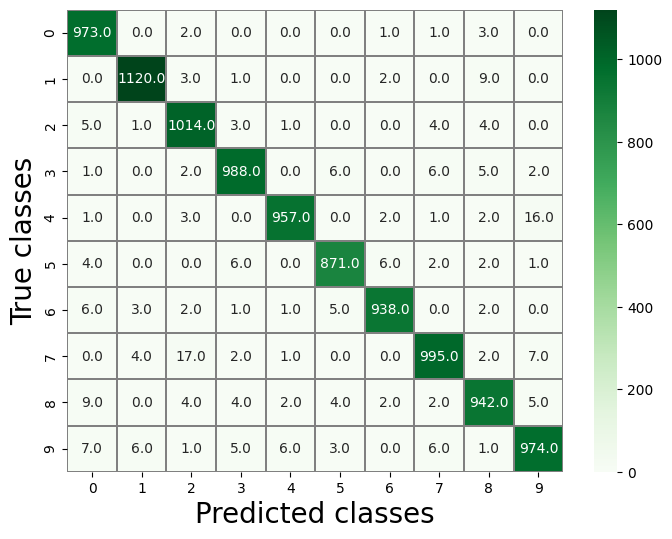

In [10]:
con_mat = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize = (8,6))
sns.heatmap(con_mat, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray',fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)

1/1 [==============================] - 0s 19ms/step


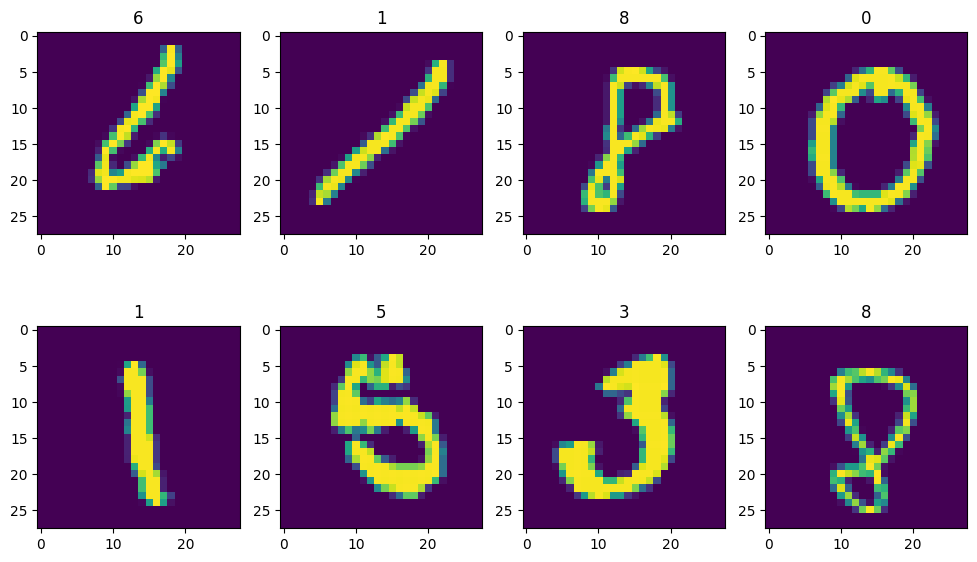

In [11]:
# all categories
cates = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize = (12,7))
for i in np.arange(8):
  ind = random.randint(0,len(X_test))
  img = X_test[ind]
  img = img.reshape(1,28,28,1)
  img = img.astype('float32')
  img = img/255.0
  v_p = np.argmax(LeNet_model.predict(img), axis=-1)
  plt.subplot(240+1+i)
  plt.imshow(X_test[ind])
  plt.title(cates[v_p[0]])